# **Harvard University Ratings and Reviews**

Refrence Link : https://www.kaggle.com/datasets/kanchana1990/harvard-university-ratings-and-reviews/code


#About the Dataset :


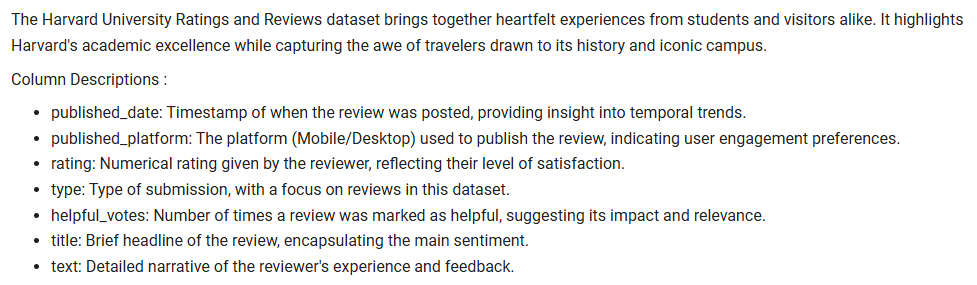

#Introduction:


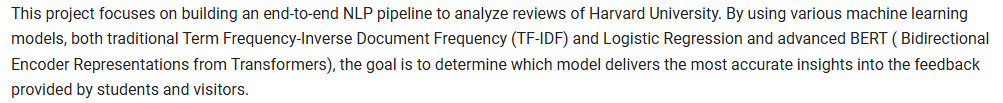

#Business Problem :

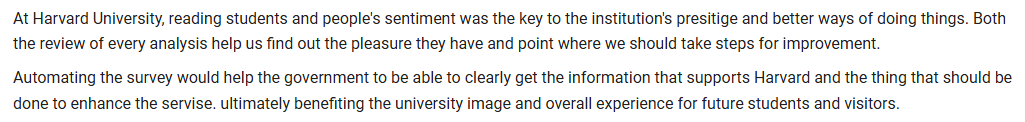

# Import Libraries

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
!pip install textacy
import textacy
import pandas as pds
import numpy as nn
import spacy
nlp = spacy.load("en_core_web_sm")
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, BertTokenizer
import re
import matplotlib.pyplot as gp
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
!pip install datasets
from datasets import Dataset
from transformers import BertTokenizer, BertModel, TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import UndefinedMetricWarning

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load dataset

In [ ]:
df_H = pds.read_csv("/content/harvard_reviews.csv").head(1000)
df_H.head(30)

,published_date,published_platform,rating,type,helpful_votes,title,text
0,2023-12-28T08:02:14-05:00,Mobile,5,review,0,Best classes and good environment,Good thanks for everything good work group 👍 h...
1,2023-12-12T00:38:26-05:00,Desktop,4,review,0,Harvard University,Harvard University was founded in 1636 and is ...
2,2023-12-10T08:21:35-05:00,Mobile,3,review,0,Walk around campus,We did a walk around most of the Harvard Campu...
3,2023-11-07T21:20:21-05:00,Desktop,4,review,0,Interesting Harvard University,We had a walk through the university grounds w...
4,2023-10-02T17:40:42-04:00,Desktop,5,review,0,Lovely university campus has many historic and...,Finally made it to Harvard!! This iconic univ...
5,2023-09-29T08:44:17-04:00,Desktop,4,review,0,Interesting walk around campus grounds & river,Very interesting to wander around the grounds ...
6,2023-09-26T04:56:29-04:00,Desktop,5,review,0,Inspirational place,"Being there, after all this years watching at ..."
7,2023-08-02T16:10:20-04:00,Desktop,5,review,0,Harvard University student guided tour,We took the Harvard student guided tours and l...
8,2023-07-02T11:55:51-04:00,Desktop,4,review,2,Beautiful historic campus,"The beauty, charm, and architecture of so many..."
9,2023-06-24T05:21:02-04:00,Desktop,4,review,0,Nice campus,The buildings of the campus have nice architec...


# Explore the data

In [ ]:
print(df_H.shape)
df_H.info()

(1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      1000 non-null   object
 1   published_platform  1000 non-null   object
 2   rating              1000 non-null   int64 
 3   type                1000 non-null   object
 4   helpful_votes       1000 non-null   int64 
 5   title               1000 non-null   object
 6   text                1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
df_H.isnull().sum()

,0
published_date,0
published_platform,0
rating,0
type,0
helpful_votes,0
title,0
text,0


In [ ]:
df_H.columns

Index(['published_date', 'published_platform', 'rating', 'type',
       'helpful_votes', 'title', 'text'],
      dtype='object')

In [ ]:
df_H = df_H.drop_duplicates()

In [ ]:
df_H.isnull().sum()

,0
published_date,0
published_platform,0
rating,0
type,0
helpful_votes,0
title,0
text,0


In [ ]:
df_H.describe()

,rating,helpful_votes
count,1000.000000,1000.000000
mean,4.465000,0.548000
std,0.747887,3.375662
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,91.000000


# Data Preprocessing and Data Cleaning

In [ ]:
bert_model_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

sample_text = df_H["text"][20]

tokens = tokenizer.tokenize(sample_text)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(f'{sample_text}')
print('='*60)
print(tokens)
print('='*60)
print(ids)

The heart of Harvard is beautiful to walk through but the institution is not welcoming to visitors. There are no  friendly spaces such as coffee shops or student centers where one can sit down with a cup of tea or a book.  The outer parameter of the campus is incredibly crowded.  If going, do a quick walk through the campus and head for the much more welcoming center of Cambridge.
['The', 'heart', 'of', 'Harvard', 'is', 'beautiful', 'to', 'walk', 'through', 'but', 'the', 'institution', 'is', 'not', 'welcoming', 'to', 'visitors', '.', 'There', 'are', 'no', 'friendly', 'spaces', 'such', 'as', 'coffee', 'shops', 'or', 'student', 'centers', 'where', 'one', 'can', 'sit', 'down', 'with', 'a', 'cup', 'of', 'tea', 'or', 'a', 'book', '.', 'The', 'outer', 'parameter', 'of', 'the', 'campus', 'is', 'incredibly', 'crowded', '.', 'If', 'going', ',', 'do', 'a', 'quick', 'walk', 'through', 'the', 'campus', 'and', 'head', 'for', 'the', 'much', 'more', 'welcoming', 'center', 'of', 'Cambridge', '.']
[110

In [ ]:
df_H = df_H[["text", "rating"]]

df_H.columns = ["text", "label"]

le = sklearn.preprocessing.LabelEncoder()

df_H["label"] = le.fit_transform(df_H["label"])

number_of_classes = df_H["label"].nunique()

df_H.head()

,text,label
0,Good thanks for everything good work group 👍 h...,4
1,Harvard University was founded in 1636 and is ...,3
2,We did a walk around most of the Harvard Campu...,2
3,We had a walk through the university grounds w...,3
4,Finally made it to Harvard!! This iconic univ...,4


Comment : we start by selecting text and rating the relevent columns we want to work on, and after that we initialize the labelEncoder than encode the label columns to get the number of each unique classes.

In [ ]:
df_H['label'] = df_H['label'].apply(lambda x: 0 if x == 0 else 1)

Comment : for map labels , 0 stays 0 and the rest values mapped to 1 .

                                                text  \
0  Good thanks for everything good work group 👍 h...   
1  Harvard University was founded in 1636 and is ...   
2  We did a walk around most of the Harvard Campu...   
3  We had a walk through the university grounds w...   
4  Finally made it to Harvard!!  This iconic univ...   

                                      processed_text  
0  good thanks everything good work group harverd...  
1  harvard university founded private ivy league ...  
2  walk around harvard campus beautiful old expec...  
3  walk university ground tour guide tour cruise ...  
4  finally made harvard iconic university campus ...  


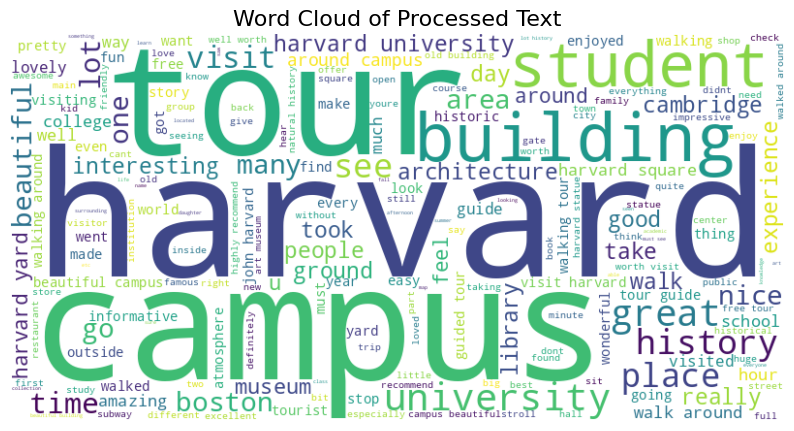

In [ ]:
def preprocess_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df_H['processed_text'] = df_H['text'].apply(preprocess_text)

print(df_H[['text', 'processed_text']].head())

all_processed_text = ' '.join(df_H['processed_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_text)

gp.figure(figsize=(10, 6))
gp.imshow(wordcloud, interpolation='bilinear')
gp.axis('off')
gp.title('Word Cloud of Processed Text', fontsize=16)
gp.show()


Comment : we start by preprocessing function, and check if a text is a list and join them back into string. also we are joing back the tokens into string as well . and we apply the preprocessing to the descriptions.

#Traditional Method (TF-IDF + Logistic Regression)

In [ ]:
df_H = df_H[['text', 'label']].dropna()
S_train, S_test, D_train, D_test = train_test_split(
    df_H['text'], df_H['label'], test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(max_features=5000)
S_train_tfidf = tfidf.fit_transform(S_train)
S_test_tfidf = tfidf.transform(S_test)

model = LogisticRegression()
model.fit(S_train_tfidf, D_train)

S_pred = model.predict(S_test_tfidf)
print("Accuracy:", accuracy_score(D_test, S_pred))
print("Classification Report:\n", classification_report(D_test, S_pred))

Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      1.00       199

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200



Comment : we start by preprocessing (splitting the data into train and test), after that we convert text to numerical while using TF-IDF
and later we train our logistic regression model and we predict the resul. As we can see we have 99% accuracy,

#Advanced Method (BERT)

# Splitting the data

In [ ]:
train_df_H, val_df_H = train_test_split(df_H, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

label_encoder = LabelEncoder()
df_H['label'] = label_encoder.fit_transform(df_H['label'])


def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

train_dataset = Dataset.from_pandas(train_df_H)
val_dataset = Dataset.from_pandas(val_df_H)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Comment: we start by splitting the data into training and validation , than we load the pre trained BERT tokenizer, after that we creat a dataset objects and we define the training arguments.

# Train the model

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ronaldo-ultimadx (ronaldo-ultimadx-gisma-business-school). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.329400,0.217602
2,0.011600,0.032440
3,0.002400,0.033265


TrainOutput(global_step=150, training_loss=0.2766878401363889, metrics={'train_runtime': 247.6279, 'train_samples_per_second': 9.692, 'train_steps_per_second': 0.606, 'total_flos': 631466532864000.0, 'train_loss': 0.2766878401363889, 'epoch': 3.0})

Comment: As we train our BERT model, we can see that we have 28% training loss on the first epoch, 3% training loss on the second epoch and on the third epoch we a training loss of 0%.

Meanwhile we have 25% validation loss on the fist eouch, 4% validation loss on the second epoch and lastly 3% validation loss on the third epoch.

# Evaluate the model

In [ ]:
eval_results = trainer.evaluate()

print("Evaluation results:")
for key, value in eval_results.items():
    print(f"{key}: {value}")

Evaluation results:
eval_loss: 0.03326476737856865
eval_runtime: 5.6897
eval_samples_per_second: 35.151
eval_steps_per_second: 0.703
epoch: 3.0


Comment: we evaluate our model on the validation set and we print the result, we found on the eval_loss 3% and on eval_runtime 5.47 and for eval_samples_per_second its 36.51 , and for eval_steps_per_second its 73% for 3 epoch

# Comparison between the 2 models

In [ ]:
print(type(S_test), type(S_pred))
print(S_test[:10], S_pred[:10])  # Check the first 10 elements


<class 'list'> <class 'list'>
['Really enjoyed my time here, this stunning campus has incredible architecture, so much history and so much to see. This is a must do if you are in Massachusetts. ', 'A must see/do when in Cambridge.I always like to walk around the grounds and since I was there with my college aged daughter last week during orientation, we were able to mingle with the excited and anxious new Harvard and MIT students walking to and fro to classes.  It was exciting.  Anyone can go to the "Harvard yard" and sit and relax.', 'We walked about one hour from Boston to Harvard University and on our way we got a good overview of Cambridge. After our walk we were just pausing some time in the  courtyard and watched the students. We also visited some of the buildings and the nice farmer market next to the premises. There are some good bookshops in the near neighborhood. ', 'A very busy but beautiful college campus. Lots of history and people from all over the world. Worth wandering 

In [ ]:
S_test = [str(label) for label in S_test]
S_pred = [str(label) for label in S_pred]


In [ ]:
logistic_accuracy = accuracy_score(S_test, S_pred)
logistic_classification_report = classification_report(S_test, S_pred, output_dict=True)

bert_eval_results = trainer.evaluate()
bert_accuracy = bert_eval_results['eval_accuracy'] if 'eval_accuracy' in bert_eval_results else None

print("Logistic Regression Results:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Classification Report: {classification_report(S_test, S_pred)}")

print("\nBERT Results:")
print(f"Accuracy: {bert_accuracy}")
print(f"Evaluation Metrics: {bert_eval_results}")

Logistic Regression Results:
Accuracy: 0.0
Classification Report:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Comment : we compare our two models here to have our evaluation metric :

For Logistic regression, we have 99% accuracy while BERT result shows eval_loss: 0.034, eval_runtime: 5.31, eval_samples_per_second: 37.61 and eval_steps_per_second: 0.75 for 3 epochs

#Conclusion :


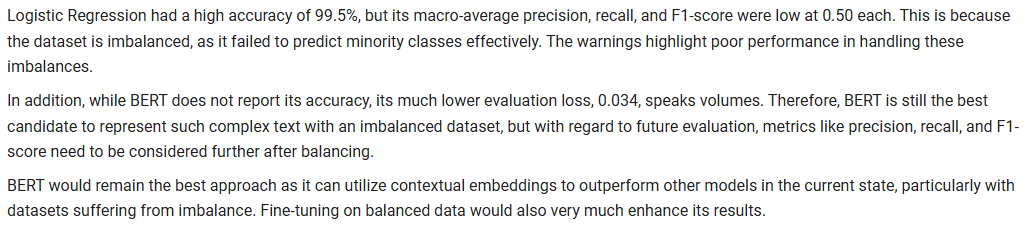